In [ ]:
'''
Exercício baseado em:

Livro: Estatística Aplicada à Administração e Economia  (2 edição)  
Autores: Anderson, Sweeney, Williams
Editora Cengage, 2021

Capítulo 9: Testes de Hipóteses  
Exercício 27 (Adaptado)
'''

In [ ]:
'''
Problema
Uma agência governamental divulgou a média dos benefícios de seguro-desemprego nos Estados Unidos: USD 238,0 por semana. Um
pesquisador gostaria de saber se a média dos benefícios de seguro-desemprego na Virgínia estava abaixo da média nacional.
Para tanto coletou uma amostra de 100 indivíduos da Virginia e estabeleceu o seguinte teste de hipóteses, considerando um 
nível de significância de 5%:

H0: μ >= 238
Ha: μ < 238    ---> teste unicaudal da cauda inferior

nivel_significancia = 0.05
μ: média populacional dos benefícios de seguro-desemprego na Vírginia (em USD por semana, em que USD é o dólar dos EUA)

Verifique se podemos rejeitar H0 e concluir que a média dos benefícios de seguro-desemprego na Virgínia estava abaixo da média
nacional.
'''

### Importação dos dados

In [1]:
import pandas as pd
import scipy.stats as stats

In [2]:
dados_amostrais = pd.read_excel('Arquivo 18.xlsx', 
                   usecols=['seguro-desemprego'],
                   skiprows=[0])

In [3]:
dados_amostrais.head()

,seguro-desemprego
0,199.05
1,211.24
2,200.53
3,335.65
4,235.06


In [4]:
n = dados_amostrais["seguro-desemprego"].count()     # n: tamanho da amostra
n

100

In [5]:
media_amostral = dados_amostrais["seguro-desemprego"].mean()
media_amostral

231.00549999999993

In [6]:
desv_pad_amostral = dados_amostrais["seguro-desemprego"].std(ddof=1)
desv_pad_amostral

79.99952514221442

### Resposta sugerida

In [ ]:
'''
nivel_significancia = 0.05    --> nivel de significancia estabelecido no estudo


H0: media_pop >= 238
Ha: media_pop < 238    ---> Estabelece um teste unicaudal da cauda inferior
'''

In [ ]:
# Podemos utilizar a função scipy.stats.ttest_1samp()

In [7]:
hipotese_media_populacional = 238

teste_t = stats.ttest_1samp(dados_amostrais["seguro-desemprego"], 
                            popmean=hipotese_media_populacional, 
                            alternative='less' )                    # less: teste unicaudal da cauda inferior

In [8]:
teste_t.statistic

-0.8743176897070201

In [9]:
teste_t.pvalue

0.1920306668713927

In [ ]:
'''
Critério de decisão: valor p
Rejeitar H0 se (valor p <= nivel de significância)


Temos:
valor p = 0.1920
nivel de significancia estabelecido = 0.05
Portanto: valor p > nivel de significância

Como (valor p > nivel de significância) não rejeitamos H0. 
Portanto, considerando o nível de significância estabelecido no estudo não há evidência estatística forte o suficiente para
concluirmos que a média dos benefícios de seguro-desemprego na Virgínia estava abaixo da média nacional.
'''

In [ ]:
# Abaixo calculamos o valor p utilizando as fórmulas que vimos em aula
# Note que o resultado é o mesmo que o obtido acima com a função scipy.stats.ttest_1samp()

In [10]:
hipotese_media_populacional = 238
erro_padrao_media_amostral = desv_pad_amostral / n ** 0.5

# Estatística de teste
t = (media_amostral - hipotese_media_populacional) / erro_padrao_media_amostral
t

-0.8743176897070344

In [11]:
graus_liberdade = n - 1

valor_p = stats.t.cdf(t, df=graus_liberdade)
valor_p

0.19203066687138898

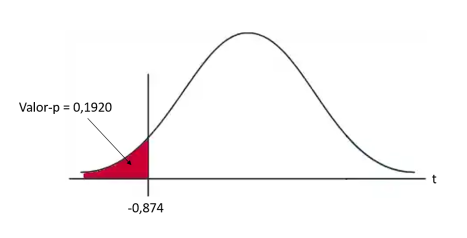